In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Metrail+dataset.csv")
data.columns = ["Month", "Travellers"]
data["Month"] = pd.to_datetime(data["Month"], format='%b-%y')
data = data.set_index("Month")
data.head(10)

,Travellers
Month,
1991-01-01,1724.0
1991-02-01,1638.0
1991-03-01,1987.0
1991-04-01,1825.0
1991-05-01,NaN
1991-06-01,1879.0
1991-07-01,1957.0
1991-08-01,2027.0
1991-09-01,1609.0


## Time Series Analysis

### Plot TIme Series Data

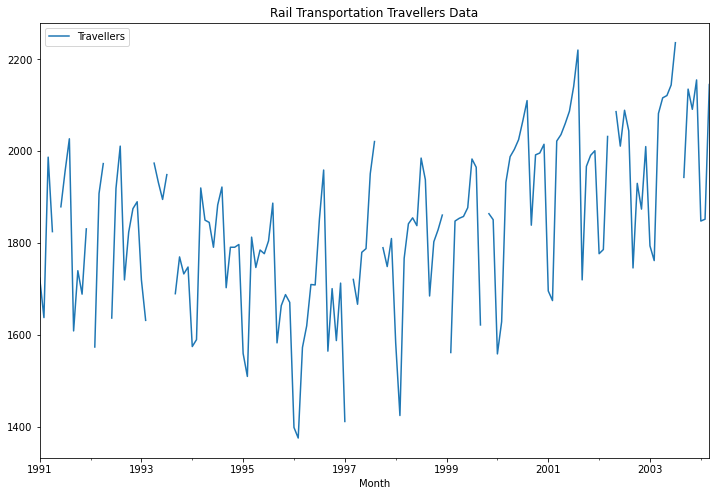

In [3]:
data.plot(figsize=([12,8]))
plt.legend(loc='best')
plt.title("Rail Transportation Travellers Data")
plt.show()

## Missing Value Treatment

### Mean Imputation

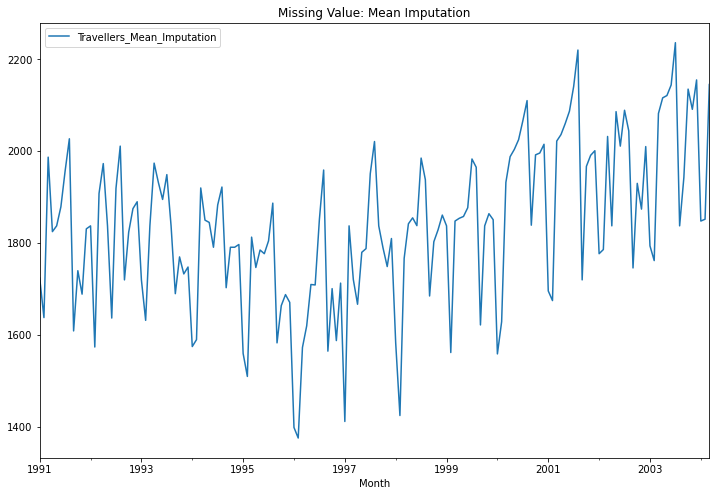

In [4]:
data = data.assign(Travellers_Mean_Imputation=data.Travellers.fillna(data.Travellers.mean()))
data[["Travellers_Mean_Imputation"]].plot(figsize=([12,8]))
plt.legend(loc='best')
plt.title("Missing Value: Mean Imputation")
plt.show()

### Last Observation Carried Forward

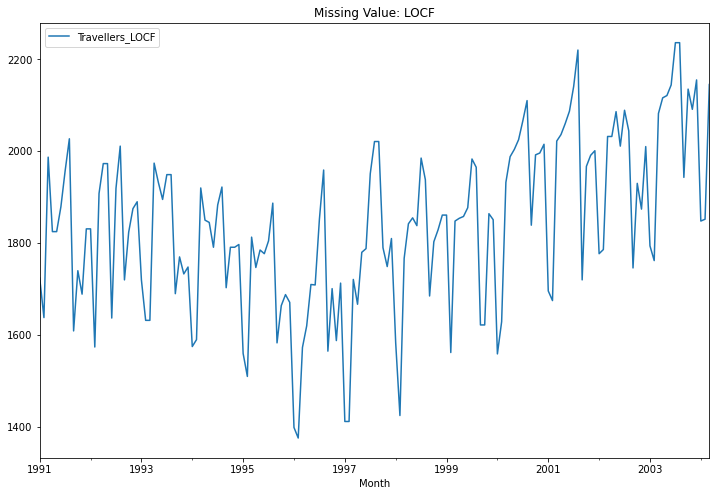

In [15]:
data = data.assign(Travellers_LOCF=data.Travellers.ffill())
# data = data.assign(Travellers_LOCF=data.Travellers.fillna(method='pad')) # same as ffill()
data[["Travellers_LOCF"]].plot(figsize=([12,8]))
plt.title("Missing Value: LOCF")
plt.show()

In [17]:
data.Travellers_LOCF.mean()

1838.685534591195

### Next Observation Carried Backward

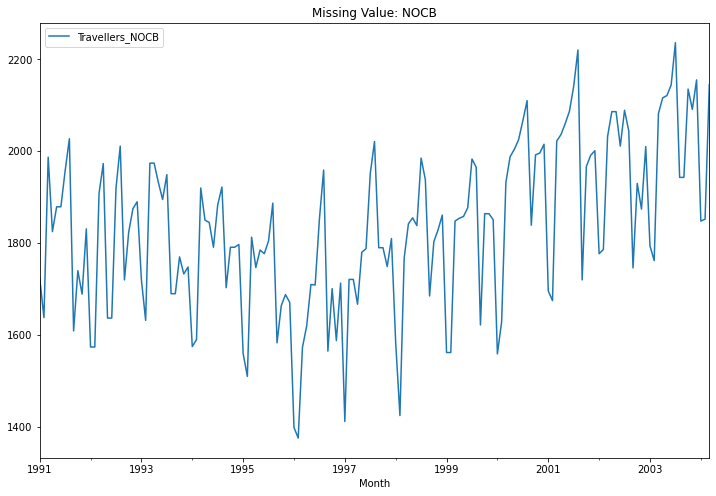

In [16]:
data = data.assign(Travellers_NOCB=data.Travellers.fillna(method='bfill'))
data[["Travellers_NOCB"]].plot(figsize=([12,8]))
plt.title("Missing Value: NOCB")
plt.show()

In [18]:
data.Travellers_NOCB.mean()

1834.446540880503

### Linear Interpolation

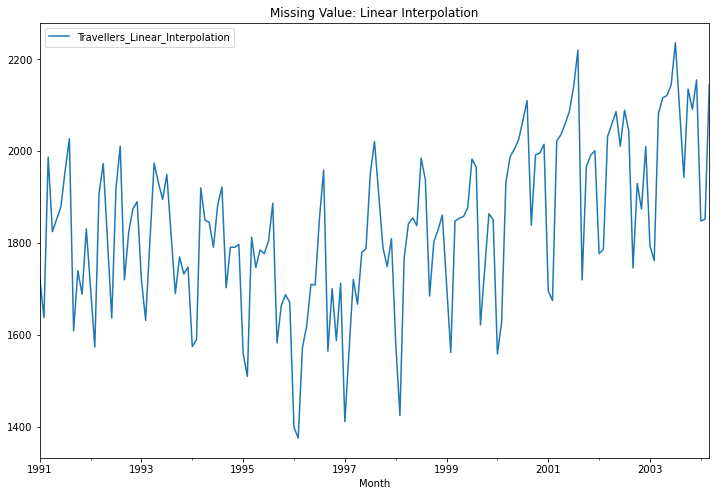

In [10]:
data = data.assign(Travellers_Linear_Interpolation=data.Travellers.interpolate("linear"))
data[["Travellers_Linear_Interpolation"]].plot(figsize=([12,8]))
plt.legend(loc='best')
plt.title("Missing Value: Linear Interpolation")
plt.show()

In [19]:
data.Travellers_Linear_Interpolation.mean()

1836.566037735849

#### Use Mean Imputation to impute missing values

In [17]:
data["Travellers"] = data["Travellers_Mean_Imputation"]